<a href="https://colab.research.google.com/github/robinsonmirandaco/RedesNeuronales_CNN/blob/main/muinar06_act2_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de Imágenes CIFAR-10 con Redes Neuronales Convolucionales**
**Universidad Internacional de La Rioja – UNIR**  
**Máster en Inteligencia Artificial**  
**Estudiante:** Robinson Miranda


# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

In [ ]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [ ]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [ ]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

## **1. Analisis Exploratorio de los Datos**

Tamaño de x_train: (40000, 32, 32, 3)
Tamaño de x_valid: (10000, 32, 32, 3)
Tamaño de x_test: (10000, 32, 32, 3)
Tamaño de y_train: (40000, 1)
Valores de etiqueta posibles: [0 1 2 3 4 5 6 7 8 9]


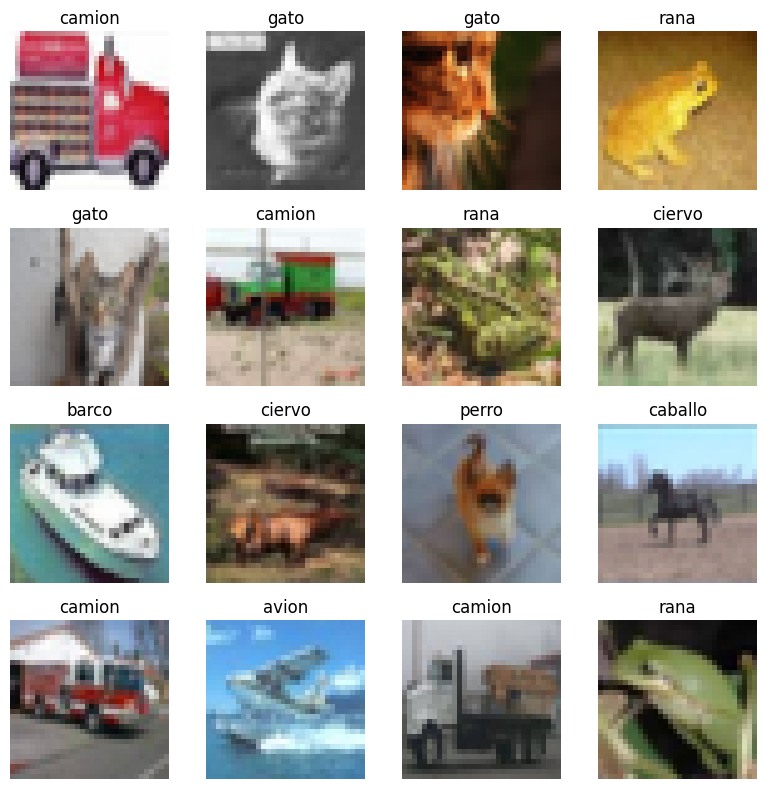

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Tamaño de x_train:", x_train.shape)
print("Tamaño de x_valid:", x_valid.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Valores de etiqueta posibles:", np.unique(y_train))

# Mostrar algunas imágenes de ejemplo con sus etiquetas
def plot_sample_images(images, labels, class_map, n=16):
    plt.figure(figsize=(8,8))
    indices = np.random.choice(len(images), n, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(4,4,i+1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(class_map[int(labels[idx][0])])
    plt.tight_layout()
    plt.show()

plot_sample_images(x_train, y_train, MAP_ELEMENTS, n=16)


## **Distribución de clases**

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
freq = dict(zip(unique, counts))
print("Frecuencia de clases en entrenamiento:")
for k,v in freq.items():
    print(f"Clase {k} ({MAP_ELEMENTS[k]}): {v}")

Frecuencia de clases en entrenamiento:
Clase 0 (avion): 3986
Clase 1 (coche): 3986
Clase 2 (ave): 4048
Clase 3 (gato): 3984
Clase 4 (ciervo): 4003
Clase 5 (perro): 3975
Clase 6 (rana): 4020
Clase 7 (caballo): 4023
Clase 8 (barco): 3997
Clase 9 (camion): 3978


## **Imagenes por Clase**

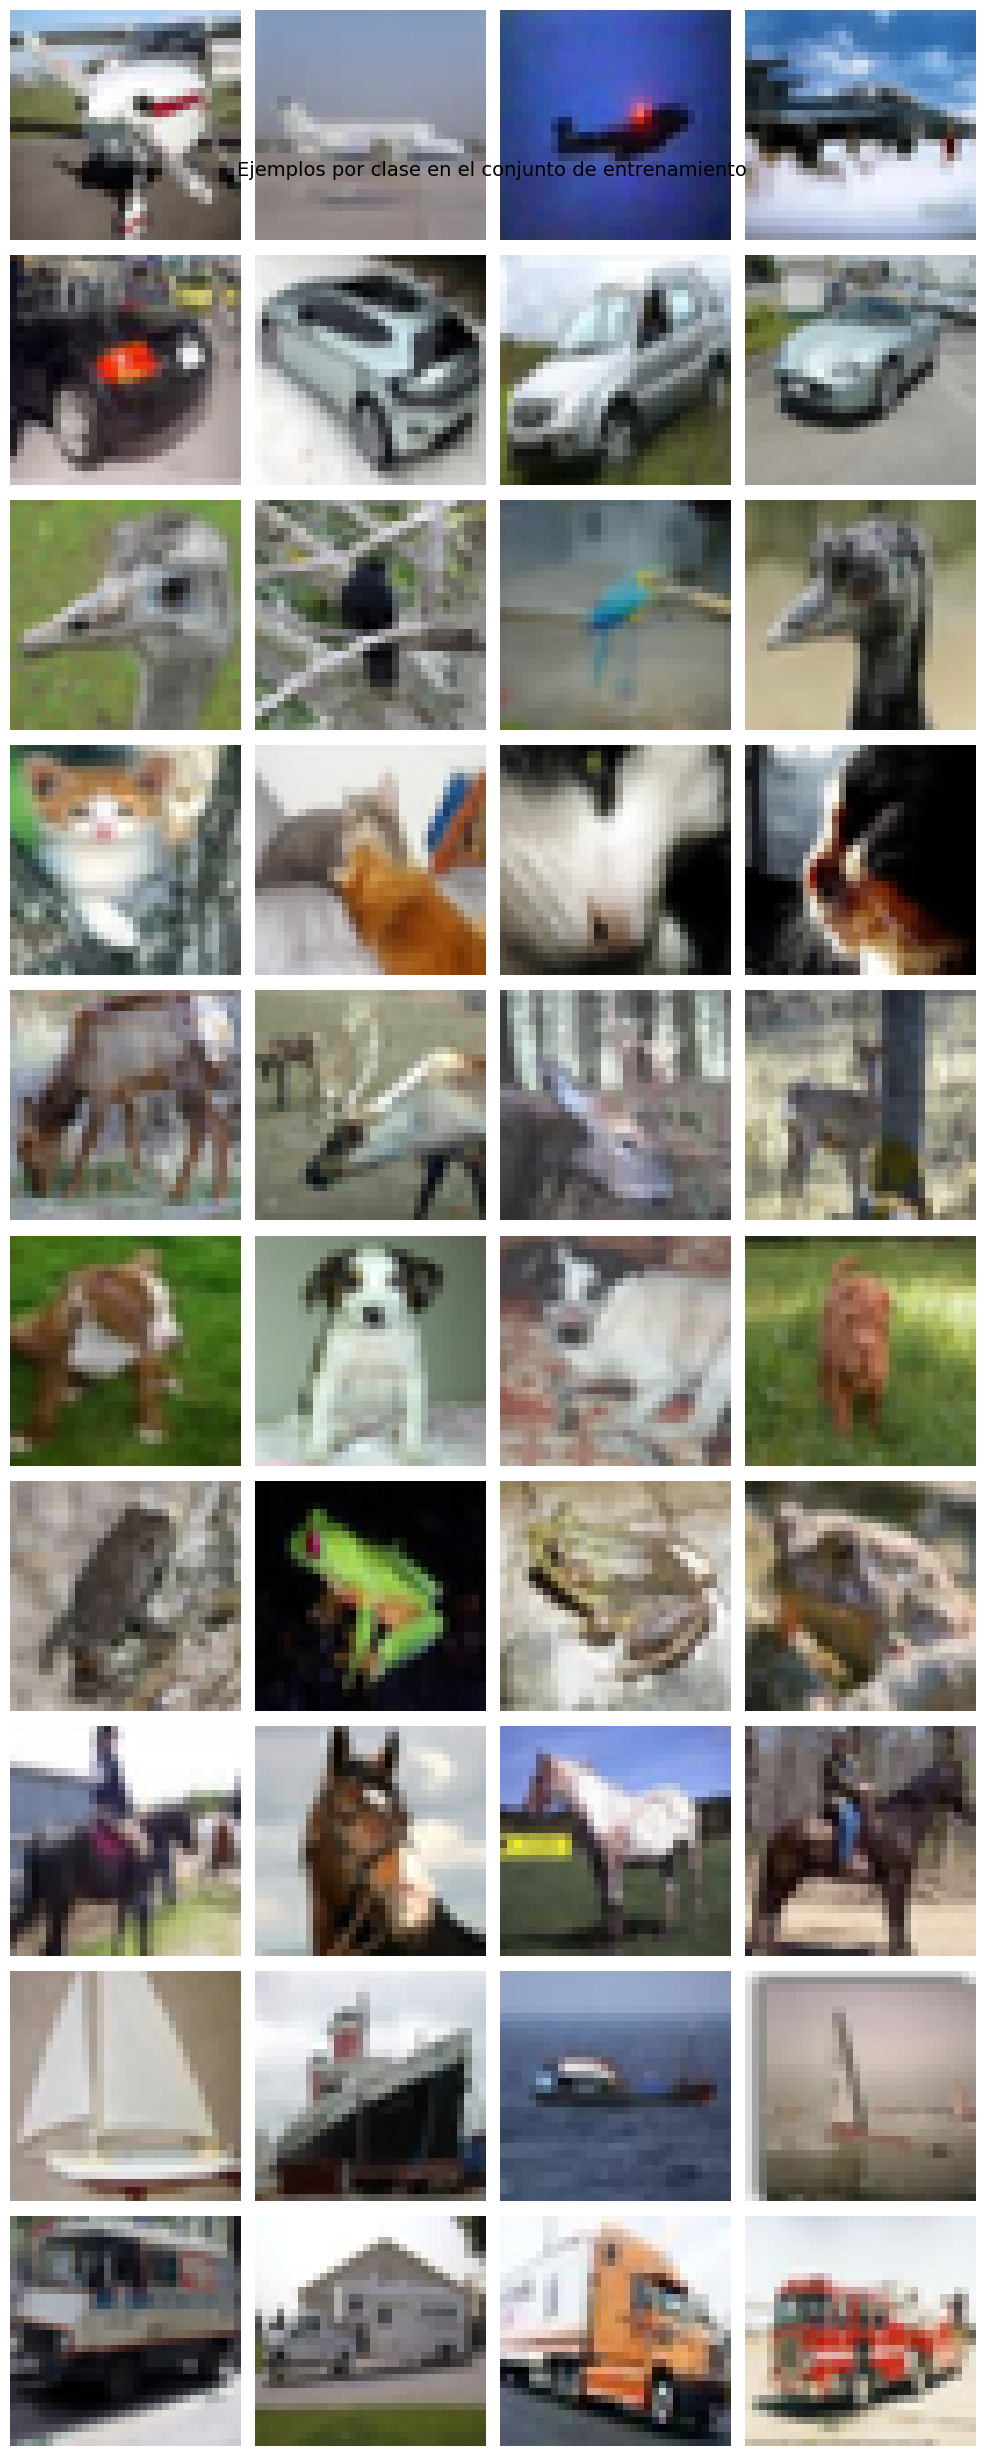

In [ ]:
def plot_images_per_class(images, labels, class_map, n_per_class=4):
    labels = labels.reshape(-1)
    num_classes = len(class_map)

    plt.figure(figsize=(n_per_class * 2.5, num_classes * 2.5))

    for c in range(num_classes):
        idxs = np.where(labels == c)[0]
        idxs = np.random.choice(idxs, size=n_per_class, replace=False)
        for j, idx in enumerate(idxs):
            plt_idx = c * n_per_class + j + 1
            plt.subplot(num_classes, n_per_class, plt_idx)
            plt.imshow(images[idx])
            plt.axis('off')
            if j == 0:
                plt.ylabel(class_map[c], rotation=0, labelpad=40, fontsize=9)

    plt.suptitle("Ejemplos por clase en el conjunto de entrenamiento", y=0.92, fontsize=14)
    plt.tight_layout()
    plt.show()

plot_images_per_class(x_train, y_train, MAP_ELEMENTS, n_per_class=4)



## **Comentario: Análisis de los datos**

Usamos CIFAR-10, que son imágenes muy pequeñas (32×32) de diez clases. La división queda en 40k para entrenar, 10k para validar y 10k para test. Al revisar la distribución se ve que las clases están balanceadas.

Al ver ejemplos, las imágenes tienen bastante ruido y poca definición, por lo que no es un dataset sencillo. Esto hace que los modelos que aplanan la imagen (como uno completamente conectado) pierdan información importante. Por eso, en este caso es más adecuado trabajar con CNNs.

## **2. Modelo baseline: Fully Connected (sin convoluciones)**

In [ ]:
from tensorflow.keras import models, layers

model_fc = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_fc.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_fc.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

## **Entrenamiento**

In [ ]:
history_fc = model_fc.fit(
    x_train, y_train_one_hot,
    epochs=20,
    batch_size=128,
    validation_data=(x_valid, y_valid_one_hot),
    verbose=2
)

Epoch 1/20
313/313 - 9s - 29ms/step - accuracy: 0.1856 - loss: 2.1661 - val_accuracy: 0.2753 - val_loss: 2.0239
Epoch 2/20
313/313 - 1s - 4ms/step - accuracy: 0.2136 - loss: 2.0621 - val_accuracy: 0.3006 - val_loss: 1.9557
Epoch 3/20
313/313 - 1s - 4ms/step - accuracy: 0.2272 - loss: 2.0334 - val_accuracy: 0.2786 - val_loss: 1.9832
Epoch 4/20
313/313 - 1s - 4ms/step - accuracy: 0.2401 - loss: 2.0020 - val_accuracy: 0.3127 - val_loss: 1.9546
Epoch 5/20
313/313 - 1s - 4ms/step - accuracy: 0.2461 - loss: 1.9899 - val_accuracy: 0.3137 - val_loss: 1.9331
Epoch 6/20
313/313 - 1s - 4ms/step - accuracy: 0.2462 - loss: 1.9831 - val_accuracy: 0.3180 - val_loss: 1.9546
Epoch 7/20
313/313 - 1s - 4ms/step - accuracy: 0.2566 - loss: 1.9690 - val_accuracy: 0.3171 - val_loss: 1.9492
Epoch 8/20
313/313 - 1s - 5ms/step - accuracy: 0.2619 - loss: 1.9629 - val_accuracy: 0.3046 - val_loss: 1.9473
Epoch 9/20
313/313 - 2s - 5ms/step - accuracy: 0.2655 - loss: 1.9471 - val_accuracy: 0.3305 - val_loss: 1.9373


## **Función auxiliar para gráficas de entrenamiento:**

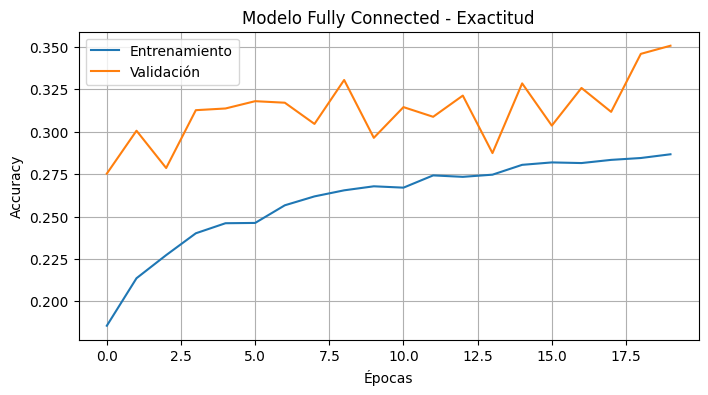

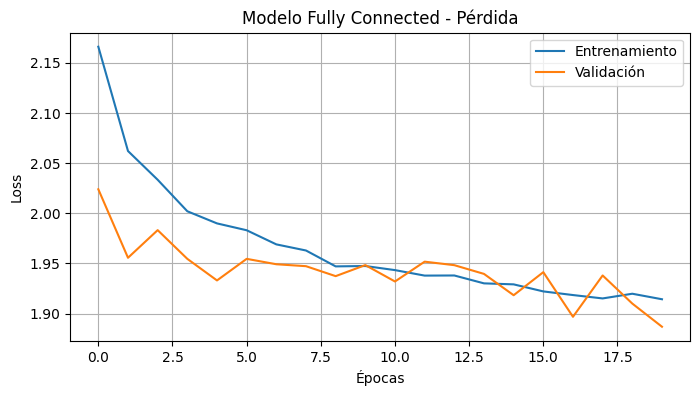

In [ ]:
def plot_history(history, title_prefix=""):
    # Exactitud
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'{title_prefix} - Exactitud')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Pérdida
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'{title_prefix} - Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_fc, "Modelo Fully Connected")

## **Evaluación en test:**

In [ ]:
test_loss_fc, test_acc_fc = model_fc.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Exactitud en test (Fully Connected): {test_acc_fc:.4f}")
print(f"Pérdida en test (Fully Connected): {test_loss_fc:.4f}")

Exactitud en test (Fully Connected): 0.3552
Pérdida en test (Fully Connected): 1.8748


## **Comentario: Modelo Fully Connected (línea base)**

Como punto de partida probé un modelo completamente conectado. Para esto, las imágenes se aplanan a un vector de 3072 valores y se pasan por dos capas densas de 512 y 256 neuronas con dropout, más una capa final de 10 neuronas para las clases de CIFAR-10. En total, el modelo tiene alrededor de 1,7 millones de parámetros entrenables.

Los resultados fueron limitados. Durante el entrenamiento, la exactitud quedó cerca del 28–29 %, y en validación se movió entre el 27 % y el 35 % según la época. La pérdida también se mantuvo alta (en torno a 1.9). Al evaluar el modelo en el conjunto de test, la exactitud obtenida fue del **35.5 %** y la pérdida quedó alrededor de **1.87**, valores coherentes con lo observado durante el entrenamiento.

En general, el modelo mejora algo al inicio pero luego se estanca, lo cual era esperable. Al aplanar las imágenes se pierde toda la estructura espacial y, con imágenes pequeñas y ruidosas como las de CIFAR-10, este tipo de red tiene dificultades para aprender patrones visuales útiles. Aun así, este modelo sirve como línea base para comparar más adelante con las distintas CNN.


##**3. Modelo CNN sencillo (baseline convolucional)**

In [ ]:
from tensorflow.keras import models, layers

model_cnn1 = models.Sequential([
    layers.Input(shape=(32, 32, 3)),     # ← ESTA LINEA QUITA EL WARNING
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_cnn1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

## **Entrenamiento**

Epoch 1/20
313/313 - 13s - 41ms/step - accuracy: 0.3778 - loss: 1.7017 - val_accuracy: 0.5180 - val_loss: 1.3433
Epoch 2/20
313/313 - 2s - 7ms/step - accuracy: 0.5301 - loss: 1.3116 - val_accuracy: 0.5968 - val_loss: 1.1286
Epoch 3/20
313/313 - 3s - 9ms/step - accuracy: 0.5957 - loss: 1.1401 - val_accuracy: 0.6305 - val_loss: 1.0330
Epoch 4/20
313/313 - 2s - 7ms/step - accuracy: 0.6386 - loss: 1.0202 - val_accuracy: 0.6720 - val_loss: 0.9326
Epoch 5/20
313/313 - 2s - 7ms/step - accuracy: 0.6782 - loss: 0.9171 - val_accuracy: 0.6928 - val_loss: 0.8811
Epoch 6/20
313/313 - 2s - 7ms/step - accuracy: 0.7063 - loss: 0.8431 - val_accuracy: 0.7170 - val_loss: 0.8144
Epoch 7/20
313/313 - 2s - 7ms/step - accuracy: 0.7252 - loss: 0.7796 - val_accuracy: 0.7250 - val_loss: 0.7937
Epoch 8/20
313/313 - 3s - 8ms/step - accuracy: 0.7441 - loss: 0.7335 - val_accuracy: 0.7251 - val_loss: 0.7851
Epoch 9/20
313/313 - 2s - 7ms/step - accuracy: 0.7643 - loss: 0.6766 - val_accuracy: 0.7317 - val_loss: 0.7656

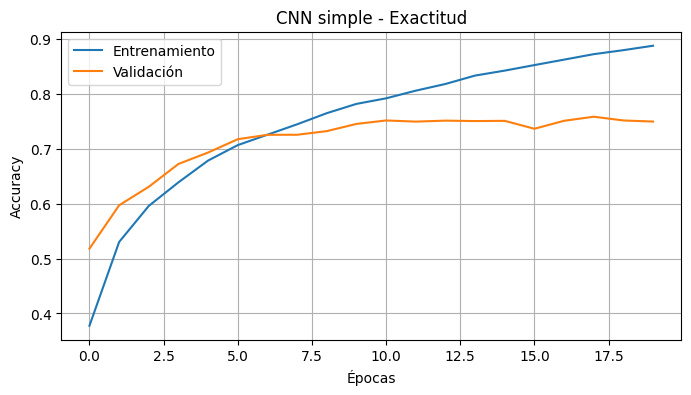

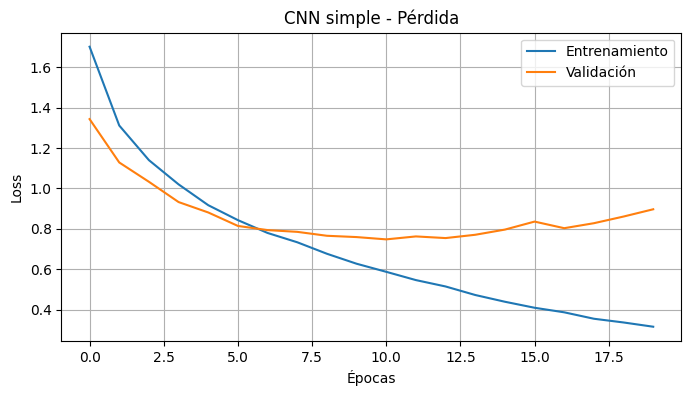

In [ ]:
history_cnn1 = model_cnn1.fit(
    x_train, y_train_one_hot,
    epochs=20,
    batch_size=128,
    validation_data=(x_valid, y_valid_one_hot),
    verbose=2
)

plot_history(history_cnn1, "CNN simple")

## **Evaluación**

In [ ]:
test_loss_cnn1, test_acc_cnn1 = model_cnn1.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Exactitud en test (CNN simple): {test_acc_cnn1:.4f}")
print(f"Pérdida en test (CNN simple): {test_loss_cnn1:.4f}")

Exactitud en test (CNN simple): 0.7401
Pérdida en test (CNN simple): 0.9175


## **Comentario: Primera CNN (modelo convolucional simple)**

Después del modelo fully connected probé una primera CNN básica. Esta red tiene tres bloques con capas `Conv2D` y `MaxPooling2D`, y luego una capa densa de 256 neuronas antes de la salida. La idea era construir una arquitectura sencilla pero capaz de aprovechar la estructura espacial de las imágenes.

A diferencia del modelo anterior, esta CNN empezó a aprender mucho más rápido. La exactitud en entrenamiento subió hasta valores cercanos al 88 %, mientras que la validación se mantuvo alrededor del 74–75 %. En el conjunto de test el modelo logró un **74.0 % de exactitud** y una pérdida cercana a **0.92**, lo cual ya representa una mejora muy grande respecto al modelo totalmente conectado (que apenas llegaba al 35 % en test).

Al mirar las curvas de entrenamiento, se nota que la red mejora de forma estable hasta aproximadamente la época 10–12. A partir de ahí aparece un poco de sobreajuste: la exactitud en entrenamiento sigue subiendo, pero la de validación se queda prácticamente igual o incluso baja ligeramente, y la pérdida de validación comienza a subir. Aun así, el modelo se comporta de forma bastante consistente y generaliza mejor que la red densa.

En general, esta primera CNN ya muestra que trabajar con convoluciones tiene un impacto directo en el rendimiento. El modelo logra captar bordes, texturas y patrones visuales que el modelo fully connected simplemente no podía reconocer. A partir de este punto, tiene sentido seguir probando arquitecturas más profundas o agregar técnicas como batch normalization y data augmentation para intentar mejorar aún más el resultado.

## **4. CNN con Batch Normalization + Data Augmentation**

## **Data Aumentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

## **Comentario:**
Para este modelo se aplicó **data augmentation** usando `ImageDataGenerator`.  
Las transformaciones usadas fueron:

- rotaciones pequeñas (hasta 15 grados),
- desplazamientos horizontales y verticales (10 %),
- volteo horizontal.

Con esto se generan versiones ligeramente modificadas de las imágenes originales en cada época. La idea es que el modelo vea más variaciones del mismo objeto y no se quede “memorizando” solo los ejemplos fijos del conjunto de entrenamiento. En la práctica, esto ayuda a reducir el sobreajuste y a mejorar la capacidad de generalización.

## **Modelo CNN más profundo con BatchNorm**

In [ ]:
from tensorflow.keras import models, layers

model_cnn2 = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,196,970 (4.57 MB)

 Trainable params: 1,195,306 (4.56 MB)

 Non-trainable params: 1,664 (6.50 KB)

## **Comentarios**:

En este segundo modelo convolucional se usa una arquitectura más profunda y con más regularización que la CNN simple:

- **Bloque 1 (32 filtros):**  
  Dos capas `Conv2D` con 32 filtros y `BatchNormalization` seguidas de `MaxPooling2D` y `Dropout`.  
  Este bloque aprende patrones básicos (bordes, formas simples) y la normalización estabiliza las activaciones para que el entrenamiento sea más estable.

- **Bloque 2 (64 filtros):**  
  De nuevo dos convoluciones (ahora con 64 filtros) + `BatchNormalization`, `MaxPooling2D` y `Dropout`.  
  Aquí el modelo empieza a captar patrones algo más complejos y el `Dropout` ayuda a evitar que se memoricen demasiado los datos de entrenamiento.

- **Bloque 3 (128 filtros):**  
  Una convolución con 128 filtros, `BatchNormalization`, `MaxPooling2D` y `Dropout`.  
  Este bloque profundiza en características más abstractas de las imágenes.

- **Parte final densa:**  
  Tras hacer `Flatten`, se usa una capa densa de 512 neuronas con `BatchNormalization`, activación ReLU y `Dropout`, y finalmente la capa de salida `Dense(10)` con *softmax*.

En total, el modelo tiene alrededor de **1,2 millones de parámetros entrenables**, algo más que la CNN simple, pero con más mecanismos de estabilización y regularización.

Durante el entrenamiento con data augmentation, la exactitud de entrenamiento se sitúa alrededor del **80 %**, mientras que la validación llega a valores próximos al **81–83 %** en las mejores épocas. En el conjunto de test, este modelo alcanza una **exactitud del 80,8 %** y una pérdida de aproximadamente **0,58**.

Comparado con la CNN simple (que obtuvo un 74 % de exactitud en test) y con el modelo fully connected (alrededor del 35 %), se observa una mejora clara. La combinación de **mayor profundidad**, **batch normalization** y **data augmentation** permite que el modelo generalice mejor y aproveche mucho más la información visual del dataset.

## **Entrenamiento con generador:**

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 38s - 61ms/step - accuracy: 0.4092 - loss: 1.6774 - val_accuracy: 0.4319 - val_loss: 1.5976
Epoch 2/30
625/625 - 24s - 38ms/step - accuracy: 0.5518 - loss: 1.2491 - val_accuracy: 0.6333 - val_loss: 1.0294
Epoch 3/30
625/625 - 41s - 65ms/step - accuracy: 0.6119 - loss: 1.0777 - val_accuracy: 0.6479 - val_loss: 0.9898
Epoch 4/30
625/625 - 24s - 38ms/step - accuracy: 0.6525 - loss: 0.9825 - val_accuracy: 0.6349 - val_loss: 1.1357
Epoch 5/30
625/625 - 23s - 38ms/step - accuracy: 0.6751 - loss: 0.9177 - val_accuracy: 0.7149 - val_loss: 0.8137
Epoch 6/30
625/625 - 23s - 37ms/step - accuracy: 0.6949 - loss: 0.8720 - val_accuracy: 0.6425 - val_loss: 1.0790
Epoch 7/30
625/625 - 23s - 37ms/step - accuracy: 0.7075 - loss: 0.8314 - val_accuracy: 0.7584 - val_loss: 0.7079
Epoch 8/30
625/625 - 24s - 38ms/step - accuracy: 0.7163 - loss: 0.8034 - val_accuracy: 0.7755 - val_loss: 0.6632
Epoch 9/30
625/625 - 24s - 38ms/step - accuracy: 0.7279 - loss: 0.7742 - val_accuracy: 0.6742 - val_loss: 0

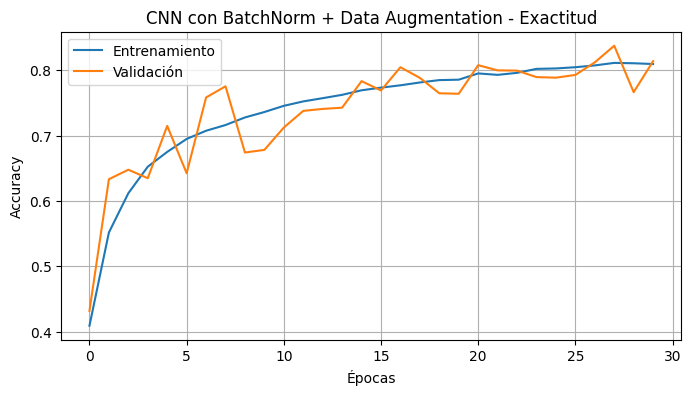

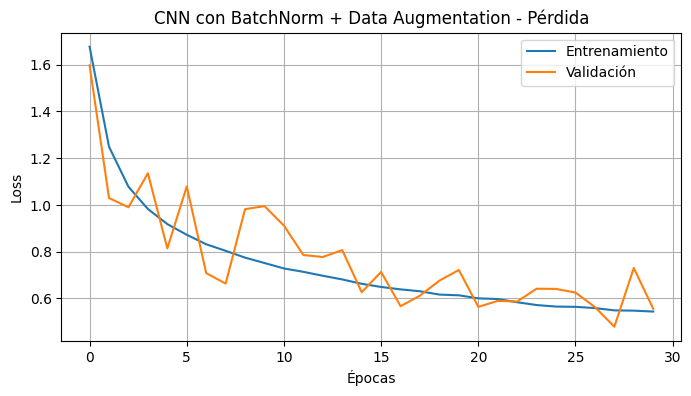

In [ ]:
batch_size = 64
epochs = 30

history_cnn2 = model_cnn2.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_valid, y_valid_one_hot),
    verbose=2
)

plot_history(history_cnn2, "CNN con BatchNorm + Data Augmentation")

## **Evaluación**

In [ ]:
test_loss_cnn2, test_acc_cnn2 = model_cnn2.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Exactitud en test (CNN BN+Aug): {test_acc_cnn2:.4f}")
print(f"Pérdida en test (CNN BN+Aug): {test_loss_cnn2:.4f}")

Exactitud en test (CNN BN+Aug): 0.8082
Pérdida en test (CNN BN+Aug): 0.5825


## **Comentario: Comportamiento del entrenamiento con Data Augmentation**

Al revisar las curvas de pérdida y exactitud del modelo con BatchNorm y data augmentation, se observa que el entrenamiento es más estable que en los modelos anteriores. La pérdida de entrenamiento baja de forma progresiva y la validación también muestra una tendencia general a mejorar, aunque con oscilaciones propias del uso de augmentations.

En la gráfica de exactitud, ambas curvas suben de manera consistente hasta situarse alrededor de valores cercanos al 80 %. Es normal que la curva de validación tenga más variaciones porque cada época recibe imágenes distintas generadas por el propio `ImageDataGenerator`.

Aun con esas fluctuaciones, el modelo mantiene una relación clara entre ambas curvas y no muestra un sobreajuste fuerte. De hecho, hacia las últimas épocas la exactitud de validación incluso supera a la de entrenamiento en algunos puntos, lo que indica que la regularización (BatchNorm + Dropout + Augmentation) está funcionando bien.


## **5. Comparación de modelos (tabla de resultados)**

In [ ]:
import pandas as pd

resultados = pd.DataFrame({
    "Modelo": [
        "Fully Connected",
        "CNN simple",
        "CNN BN + Augmentation"
    ],
    "Test Accuracy": [
        test_acc_fc,
        test_acc_cnn1,
        test_acc_cnn2
    ],
    "Test Loss": [
        test_loss_fc,
        test_loss_cnn1,
        test_loss_cnn2
    ]
})

resultados

,Modelo,Test Accuracy,Test Loss
0,Fully Connected,0.3552,1.874791
1,CNN simple,0.7401,0.917516
2,CNN BN + Augmentation,0.8082,0.582502


## **Comentario: Comparación de modelos entrenados**

| Modelo                          | Arquitectura principal                                  | Regularización / Técnicas usadas                    | Accuracy Test | Loss Test |
|--------------------------------|-----------------------------------------------------------|------------------------------------------------------|---------------|-----------|
| Fully Connected (baseline)     | 2 capas densas (512–256) + Flatten                       | Dropout                                              | **35.5 %**    | 1.87      |
| CNN simple                     | 3 bloques Conv2D + MaxPooling + Dense(256) + Dropout     | Dropout                                              | **74.0 %**    | 0.92      |
| CNN profunda BN + Augmentation | 3 bloques Conv2D (32–64–128) + BatchNorm + Dense(512)   | BatchNorm, Dropout, Data Augmentation               | **80.8 %**    | 0.58      |


En general, se observa una mejora clara conforme aumenta la capacidad del modelo y se aplican técnicas de regularización. El modelo fully connected sirve únicamente como referencia, ya que al aplanar las imágenes pierde toda la información espacial y su rendimiento se queda muy bajo.

La primera CNN ya aprovecha las características visuales del dataset y sube el rendimiento hasta un 74 %, evidenciando que las convoluciones capturan patrones que la red densa no puede aprender.

Finalmente, la CNN más profunda con batch normalization y data augmentation ofrece el mejor equilibrio entre aprendizaje y generalización. El aumento de profundidad y la normalización aceleran el entrenamiento, mientras que el data augmentation ayuda a evitar el sobreajuste. Esto se refleja en el resultado final del test, con una exactitud de aproximadamente 81 %, el valor más alto entre todos los modelos probados.

## **6. Análisis de las clases y errores del mejor modelo**

In [ ]:
# Predicciones en test
y_pred_probs = model_cnn2.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.reshape(-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## **Clasification report por clase**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = [MAP_ELEMENTS[i] for i in range(num_classes)]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       avion       0.79      0.90      0.84      1000
       coche       0.93      0.93      0.93      1000
         ave       0.92      0.58      0.71      1000
        gato       0.75      0.59      0.66      1000
      ciervo       0.72      0.84      0.78      1000
       perro       0.88      0.56      0.69      1000
        rana       0.67      0.95      0.79      1000
     caballo       0.77      0.91      0.84      1000
       barco       0.91      0.88      0.89      1000
      camion       0.87      0.93      0.90      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.80     10000
weighted avg       0.82      0.81      0.80     10000



### **Comentario: Métricas por clase**

Las métricas por clase muestran un rendimiento bastante equilibrado, aunque con diferencias claras entre tipos de objetos. Las clases de vehículos como **coche**, **camión** y **barco** son las que obtienen los mejores resultados, con precisiones y recalls cercanos al 0.90 o superiores. Estas clases suelen tener formas más definidas y colores más homogéneos, lo que facilita la clasificación.

En cambio, las clases de animales presentan más dificultad. Tanto **gato**, **perro** como **ave** tienen recalls más bajos (entre 0.56 y 0.59), lo que indica que el modelo confunde estas clases con otras. Esto es normal en CIFAR-10, donde muchos animales aparecen con fondos complejos o poco definidos.

También destaca el caso de **rana**, que tiene un recall muy alto (0.95) pero una precisión moderada. Esto significa que casi todas las ranas reales se clasifican bien, pero el modelo también confunde otras clases con esta.

En conjunto, el modelo logra un rendimiento sólido con un **81 % de exactitud general**, lo que confirma que la arquitectura profunda con batch normalization y data augmentation mejora la capacidad de generalización.


## **Matriz de confusión**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


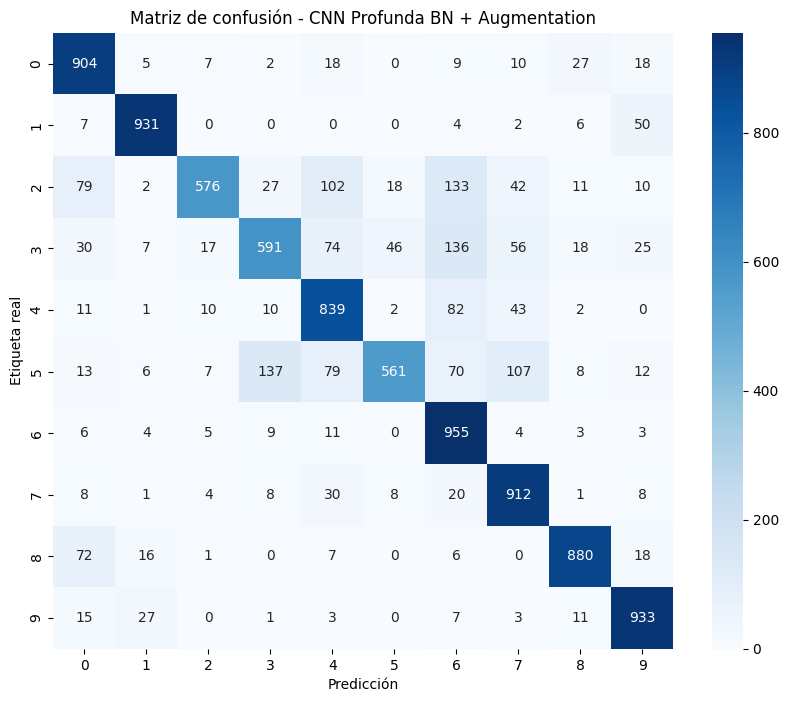

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones del modelo final
y_pred_cnn2 = model_cnn2.predict(x_test).argmax(axis=1)
y_true = y_test.flatten()

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_cnn2)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - CNN Profunda BN + Augmentation")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()


### **Comentario: Matriz de confusión**

Al revisar la matriz de confusión del modelo final, se observa que las clases de vehículos son las más sólidas. “Coche”, “camión” y “barco” concentran la mayoría de sus predicciones en la diagonal, con valores muy altos como 931, 933 y 880 aciertos respectivamente. Estas clases prácticamente no se mezclan entre sí, salvo algunas confusiones puntuales entre coche y camión.

En contraste, las clases de animales muestran más errores. “Ave”, “gato” y “perro” son las más afectadas, y se confunden entre ellas de forma consistente. Por ejemplo, las aves se confunden con ranas y gatos; los gatos tienen un error notable hacia la clase perro; y los perros se confunden tanto con gatos como con ranas. Estas confusiones coinciden con lo que se ve en las métricas por clase.

La clase “rana” destaca porque tiene muy pocos errores: el modelo acierta 955 imágenes y casi no recibe predicciones equivocadas desde otras clases. Esto explica su recall muy alto. “Ciervo” y “caballo” también muestran un buen desempeño, aunque comparten algunos errores entre ellas y con otras clases de animales.

En general, la matriz confirma que el modelo funciona mejor en clases con formas bien definidas (vehículos) y tiene dificultades en clases donde los animales presentan texturas o colores similares dentro de imágenes pequeñas y ruidosas, como es el caso de CIFAR-10.



##**Visualizar ejemplos mal clasificados**

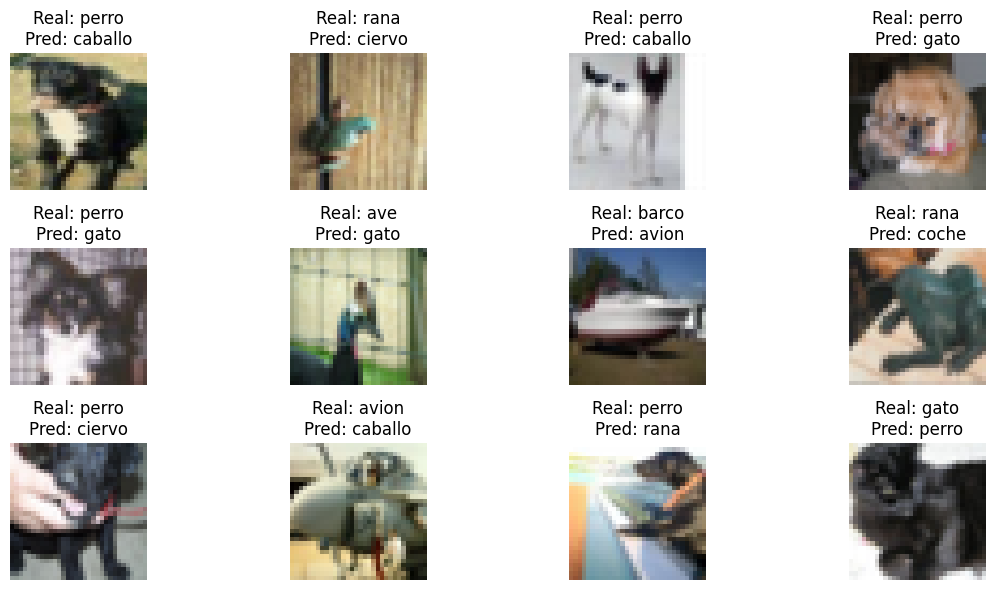

In [ ]:
def plot_misclassified(images, y_true, y_pred, class_map, n=12):
    errores = np.where(y_true != y_pred)[0]
    seleccion = np.random.choice(errores, size=min(n, len(errores)), replace=False)

    plt.figure(figsize=(12,6))
    for i, idx in enumerate(seleccion):
        plt.subplot(3,4,i+1)
        plt.imshow(images[idx])
        plt.axis('off')
        true_label = class_map[int(y_true[idx])]
        pred_label = class_map[int(y_pred[idx])]
        plt.title(f"Real: {true_label}\nPred: {pred_label}")
    plt.tight_layout()
    plt.show()

plot_misclassified(x_test, y_true, y_pred, MAP_ELEMENTS, n=12)

### **Comentario: Análisis visual de errores**

Al revisar algunas de las imágenes mal clasificadas, se nota que muchos de los errores ocurren en clases que ya aparecían como problemáticas en la matriz de confusión. Por ejemplo, varias imágenes de perros fueron clasificadas como caballo o gato. Esto tiene sentido porque, en las imágenes de CIFAR-10, los perros suelen aparecer con fondos ruidosos o en posiciones donde su forma no es tan clara, lo que hace que el modelo confunda sus rasgos con los de otros animales.

También se ve que algunas aves fueron clasificadas como gato, y en otros casos las ranas fueron confundidas con ciervo o incluso con coche. En estas imágenes, el principal problema parece ser la baja resolución: muchas de ellas están borrosas o presentan colores que se mezclan con el fondo, dificultando la identificación del objeto principal.

Otro ejemplo interesante es el de una imagen de avión predicha como caballo, donde prácticamente no se distingue la forma del objeto debido a sombras y a la perspectiva. De igual forma, algunas predicciones erróneas hacia la clase “rana” coinciden con imágenes donde el color dominante es verde o marrón, independientemente del objeto real.

En general, estos ejemplos muestran que el modelo se equivoca principalmente cuando el objeto aparece poco definido, con fondos complejos o cuando la forma del animal no es clara. Estos errores coinciden con los patrones observados en las métricas por clase y en la matriz de confusión.


# **Conclusión**

En general, el ejercicio muestra que el rendimiento mejora a medida que el modelo aprovecha mejor la estructura de las imágenes y se aplican técnicas de regularización. El modelo fully connected quedó como una referencia inicial, con una exactitud baja. La primera CNN ya ofreció una mejora significativa al trabajar con convoluciones. Finalmente, la CNN más profunda con batch normalization y data augmentation fue la que mejor generalizó, alcanzando alrededor del 81 % de exactitud en test. Este resultado confirma que combinar mayor profundidad con técnicas como BN, Dropout y augmentations ayuda a controlar el sobreajuste y a obtener un modelo más robusto para este tipo de datos.
